[Return to NeoPZ-Overview](NeoPZ-Overview.ipynb)

## 6. Creating an approximation space

Within the NeoPZ library approximation spaces can be either continuous, discontinuous, $H(div)$ or $H(curl)$ (see Figure 1). Special purpose approximation spaces such as reduced approximation space and SBFEM approximation spaces
are available but require specific documentation.

The abstract root class for approximation spaces is TPZCompEl. The main attribute of TPZCompEl is to define the equations associated with an element and define an interface to the CalcStiff and CalcResidual methods. In this sense,TPZCompEl can be viewed as a Matrix Analysis class rather than a approximation space class. The fact is that (in our view) the core of the finite element method is (through the Galerkin method abstraction) to define operations on function spaces translating sets of functions into algebraic problems.

### 6.1. CompMesh examples

In order to demonstrate the differences between $H^1$ and $H(div)$ computational meshes and show how the connectivities and degrees of freedom are considered in NeoPZ, a simple example of a computational mesh with subelements is shown as follows.

#### 6.1.1. TPZCompMesh for $H^1$ approximation space

In the following, an output file of a computational mesh and its respective representation (see Figure 2) are shown.

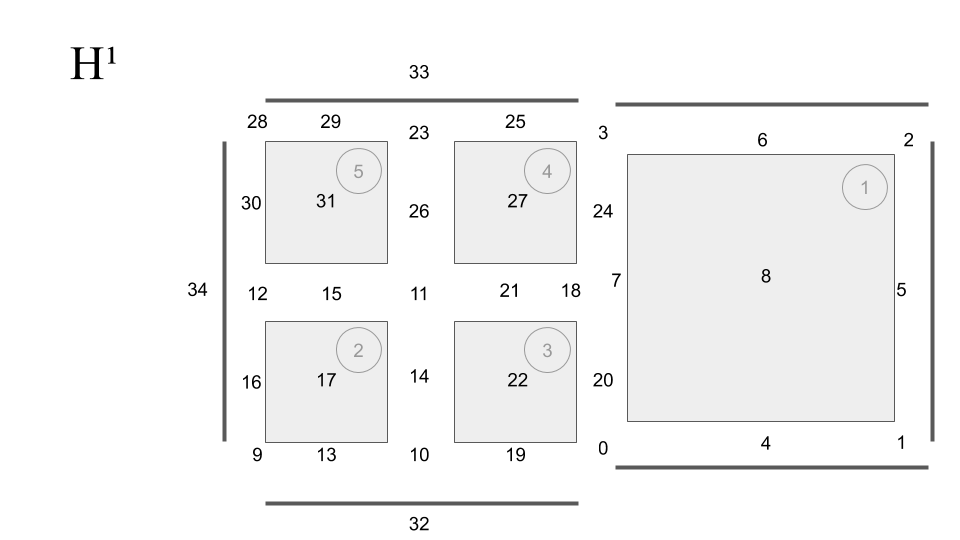

##### Connect list

Firstly, the cmesh print shows generally the number of connects and elements, as well as the number of materials and dimension of the computational mesh. Next, the information of each connect is shown:
 * Index
 * Sequence number
 * Polynomial order
 * Number of state variables (for example, in Poisson problems nstate=1 and for Elasticity problems nstate=2)
 * If the connect is condensed (0 for false, 1 for true)
 * If is related to a Lagrange multiplier (0 for false, 1 for true)
 * Number of equation (position in global stiffness matrix)
 * Number of elements linked to this connect
 * Size of the block
 * Solution (if avaliable)
 
This part of the output file also shows the connects which has dependencies. In this example, the father element is composed by the connects 9, 0 3 and 28, so these connects have dependencies.

There are 11 elements, in which 5 are domain elements and 6 are boundary elements (where the boundary conditions were set).

<span style="font-family:monaco; color:gray">



COMPUTABLE GRID INFORMATIONS:

TITLE-> H1_Example

number of connects            = 35
number of elements            = 11
number of materials           = 2
dimension of the mesh         = 2

Connect Information:

 Index 0 TPZConnect : Sequence number = 0  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 0	NumElCon = 6 Block size 1 Solution 0 \
 Index 1 TPZConnect : Sequence number = 1  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 1	NumElCon = 3 Block size 1 Solution 0 \
 Index 2 TPZConnect : Sequence number = 2  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 2	NumElCon = 3 Block size 1 Solution 0 \
 Index 3 TPZConnect : Sequence number = 3  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 3	NumElCon = 6 Block size 1 Solution 0 \
 Index 4 TPZConnect : Sequence number = 4  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 4	NumElCon = 2 Block size 0 Solution \
 Index 5 TPZConnect : Sequence number = 5  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 4	NumElCon = 2 Block size 0 Solution \
 Index 6 TPZConnect : Sequence number = 6  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 4	NumElCon = 2 Block size 0 Solution \
 Index 7 TPZConnect : Sequence number = 7  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 4	NumElCon = 1 Block size 0 Solution \
 Index 8 TPZConnect : Sequence number = 8  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 4	NumElCon = 1 Block size 0 Solution \
 Index 9 TPZConnect : Sequence number = 9  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 4	NumElCon = 5 Block size 1 Solution 0 \
 Index 10 TPZConnect : Sequence number = 31  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 7	NumElCon = 2 Block size 1 Solution 0 

Dependency :

Connect index = 0

Writing matrix ' ' (1 x 1):
	0.5  

Connect index = 9
Writing matrix ' ' (1 x 1):
	0.5  

 Index 11 TPZConnect : Sequence number = 10  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 5	NumElCon = 4 Block size 1 Solution 0 \
 Index 12 TPZConnect : Sequence number = 32  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 8	NumElCon = 2 Block size 1 Solution 0 
 
Dependency :

Connect index = 9

Writing matrix ' ' (1 x 1):
	0.5  

Connect index = 28

Writing matrix ' ' (1 x 1):
	0.5  

 Index 13 TPZConnect : Sequence number = 11  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 14 TPZConnect : Sequence number = 12  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 2 Block size 0 Solution \
 Index 15 TPZConnect : Sequence number = 13  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 2 Block size 0 Solution \
 Index 16 TPZConnect : Sequence number = 14  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 17 TPZConnect : Sequence number = 15  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 18 TPZConnect : Sequence number = 33  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 9	NumElCon = 2 Block size 1 Solution 0 

Dependency :

Connect index = 0

Writing matrix ' ' (1 x 1):
	0.5  


Connect index = 3

Writing matrix ' ' (1 x 1):
	0.5  

 Index 19 TPZConnect : Sequence number = 16  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 20 TPZConnect : Sequence number = 17  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 21 TPZConnect : Sequence number = 18  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 2 Block size 0 Solution \
 Index 22 TPZConnect : Sequence number = 19  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 23 TPZConnect : Sequence number = 34  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 10	NumElCon = 2 Block size 1 Solution 0 

Dependency :

Connect index = 28

Writing matrix ' ' (1 x 1):
	0.5  

Connect index = 3

Writing matrix ' ' (1 x 1):
	0.5  

 Index 24 TPZConnect : Sequence number = 20  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 25 TPZConnect : Sequence number = 21  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 26 TPZConnect : Sequence number = 22  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 2 Block size 0 Solution \
 Index 27 TPZConnect : Sequence number = 23  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 1 Block size 0 Solution \
 Index 28 TPZConnect : Sequence number = 24  Order = 1  NState = 1  NShape 1 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 5 Block size 1 Solution 0 \
 Index 29 TPZConnect : Sequence number = 25  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 7	NumElCon = 1 Block size 0 Solution \
 Index 30 TPZConnect : Sequence number = 26  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 7	NumElCon = 1 Block size 0 Solution \
 Index 31 TPZConnect : Sequence number = 27  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 7	NumElCon = 1 Block size 0 Solution \
 Index 32 TPZConnect : Sequence number = 28  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 7	NumElCon = 1 Block size 0 Solution \
 Index 33 TPZConnect : Sequence number = 29  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 7	NumElCon = 1 Block size 0 Solution \
 Index 34 TPZConnect : Sequence number = 30  Order = 1  NState = 1  NShape 0 IsCondensed 0 IsLagrMult 0	Equation = 7	NumElCon = 1 Block size 0 Solution

	
</span>

##### Computational Elements list (domain elements)

In the sequence, the information of each computational element is shown. The data includes:
 * Index of the computational ement
 * Index of the geometric element (fReferenceIndex)
 * Center coordinates
 * The material id
 * The number of connects and its connect indexes (jointly with the connect index there are the number of shape functions associated to each connect)
 * The polynomial order
 * The corner nodes coordinates
 * The polynomial order of each side
 * The numerical integration order and its respective integration points with its weights.
 
 Figure 2 shows the position of each connect, for all elements. It can be seen the connectivity between the interface of each element. For the hang node (which exists due the division of the first geometric element into subelements), the connect index is different of the neighbour master element. The order of enumeration starts with the corner nodes, then to the edges and finally to the volume. The standard order is count-clockwise.

<span style="font-family:monaco; color:gray">
 
 Computable Element Information:


 Index 0 virtual void TPZInterpolatedElement::Print(std::ostream &) const
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 0 \
fReferenceIndex 1 \
Center coordinate: 1.5, 0.5, 0 \
Material id 0 \
Number of connects = 9 \
Connect indexes : 0 1 2 3 4 5 6 7 8 \
PreferredSideOrder 1 \
Index = 0 - Center coordinate: [0]1, 0, 0 [1]2, 0, 0 [2]2, 1, 0 [3]1, 1, 0 \
Number of connects = 9 Connect indexes/NShape : 0/1 1/1 2/1 3/1 4/0 5/0 6/0 7/0 8/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 \
 side 3 orders 1 \
 side 4 orders 1 1 1 \
 side 5 orders 1 1 1 \
 side 6 orders 1 1 1 \
 side 7 orders 1 1 1 \
 side 8 orders 1 1 1 1 1 1 1 1 1 \
material id 0 \
Integration orders : 	2	2	Cubature rule (TPZIntQuad) 4 : Order ( 2 2 ) \
Number of points 4 \
ip 0 pos -0.57735, -0.57735 w 1 \
ip 1 pos -0.57735, 0.57735 w 1 \
ip 2 pos 0.57735, -0.57735 w 1 \
ip 3 pos 0.57735, 0.57735 w 1 

	Reference Index = 1


 Index 1 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const \

Output for a computable element index: 1 \
fReferenceIndex 2 
Center coordinate: 0.25, 0.25, 0 \
Material id 0 \
Number of connects = 9 \
Connect indexes : 9 10 11 12 13 14 15 16 17 \
PreferredSideOrder 1 \
Index = 1 - Center coordinate: [0]0, 0, 0 [1]0.5, 0, 0 [2]0.5, 0.5, 0 [3]0, 0.5, 0 \
Number of connects = 9 Connect indexes/NShape : 9/1 10/1 11/1 12/1 13/0 14/0 15/0 16/0 17/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 \
 side 3 orders 1 \
 side 4 orders 1 1 1 \
 side 5 orders 1 1 1 \
 side 6 orders 1 1 1 \
 side 7 orders 1 1 1 \
 side 8 orders 1 1 1 1 1 1 1 1 1 \
material id 0 \
Integration orders : 	2	2	Cubature rule (TPZIntQuad) 4 : Order ( 2 2 ) \
Number of points 4 \
ip 0 pos -0.57735, -0.57735 w 1 \
ip 1 pos -0.57735, 0.57735 w 1 \
ip 2 pos 0.57735, -0.57735 w 1 \
ip 3 pos 0.57735, 0.57735 w 1

	Reference Index = 2


 Index 2 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 2 \
fReferenceIndex 3 \
Center coordinate: 0.75, 0.25, 0 \
Material id 0 \
Number of connects = 9 \
Connect indexes : 10 0 18 11 19 20 21 14 22 \
PreferredSideOrder 1 \
Index = 2 - Center coordinate: [0]0.5, 0, 0 [1]1, 0, 0 [2]1, 0.5, 0 [3]0.5, 0.5, 0 \
Number of connects = 9 Connect indexes/NShape : 10/1 0/1 18/1 11/1 19/0 20/0 21/0 14/0 22/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 \
 side 3 orders 1 \
 side 4 orders 1 1 1 \
 side 5 orders 1 1 1 \
 side 6 orders 1 1 1 \
 side 7 orders 1 1 1 \
 side 8 orders 1 1 1 1 1 1 1 1 1 \
material id 0 \
Integration orders : 	2	2	Cubature rule (TPZIntQuad) 4 : Order ( 2 2 ) \
Number of points 4 \
ip 0 pos -0.57735, -0.57735 w 1 \
ip 1 pos -0.57735, 0.57735 w 1 \
ip 2 pos 0.57735, -0.57735 w 1 \
ip 3 pos 0.57735, 0.57735 w 1

	Reference Index = 3


 Index 3 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 3 \
fReferenceIndex 4 \
Center coordinate: 0.75, 0.75, 0 \
Material id 0 \
Number of connects = 9 \
Connect indexes : 11 18 3 23 21 24 25 26 27 \
PreferredSideOrder 1 \
Index = 3 - Center coordinate: [0]0.5, 0.5, 0 [1]1, 0.5, 0 [2]1, 1, 0 [3]0.5, 1, 0 \
Number of connects = 9 Connect indexes/NShape : 11/1 18/1 3/1 23/1 21/0 24/0 25/0 26/0 27/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 \
 side 3 orders 1 \
 side 4 orders 1 1 1 \
 side 5 orders 1 1 1 \
 side 6 orders 1 1 1 \
 side 7 orders 1 1 1 \
 side 8 orders 1 1 1 1 1 1 1 1 1 \
material id 0 \
Integration orders : 	2	2	Cubature rule (TPZIntQuad) 4 : Order ( 2 2 ) \
Number of points 4 \
ip 0 pos -0.57735, -0.57735 w 1 \
ip 1 pos -0.57735, 0.57735 w 1 \
ip 2 pos 0.57735, -0.57735 w 1 \
ip 3 pos 0.57735, 0.57735 w 1

	Reference Index = 4


 Index 4 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 4 \
fReferenceIndex 5 \
Center coordinate: 0.25, 0.75, 0 \
Material id 0 \
Number of connects = 9 \
Connect indexes : 12 11 23 28 15 26 29 30 31 \
PreferredSideOrder 1 \
Index = 4 - Center coordinate: [0]0, 0.5, 0 [1]0.5, 0.5, 0 [2]0.5, 1, 0 [3]0, 1, 0 \
Number of connects = 9 Connect indexes/NShape : 12/1 11/1 23/1 28/1 15/0 26/0 29/0 30/0 31/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 \
 side 3 orders 1 \
 side 4 orders 1 1 1 \
 side 5 orders 1 1 1 \
 side 6 orders 1 1 1 \
 side 7 orders 1 1 1 \
 side 8 orders 1 1 1 1 1 1 1 1 1 \
material id 0 \
Integration orders : 	2	2	Cubature rule (TPZIntQuad) 4 : Order ( 2 2 ) \
Number of points 4 \
ip 0 pos -0.57735, -0.57735 w 1 \
ip 1 pos -0.57735, 0.57735 w 1 \
ip 2 pos 0.57735, -0.57735 w 1 \
ip 3 pos 0.57735, 0.57735 w 1

</span>

##### Computational Element list (interface elements)

The boundary elements are listed as follows. Only 3 additional connects were needed due to the hang nodes.

<span style="font-family:monaco; color:gray">
    Reference Index = 5


 Index 5 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 5 \
fReferenceIndex 6 \
Center coordinate: 0.5, 0, 0 \
Material id -1 \
Number of connects = 3 \
Connect indexes : 9 0 32 \ 
PreferredSideOrder 1 \
Index = 5 - Center coordinate: [0]0, 0, 0 [1]1, 0, 0 \
Number of connects = 3 Connect indexes/NShape : 9/1 0/1 32/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 1 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 6


 Index 6 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 6 \
fReferenceIndex 7 \
Center coordinate: 0.5, 1, 0 \
Material id -1 \
Number of connects = 3 \
Connect indexes : 3 28 33 \
PreferredSideOrder 1 \
Index = 6 - Center coordinate: [0]1, 1, 0 [1]0, 1, 0 \
Number of connects = 3 Connect indexes/NShape : 3/1 28/1 33/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 1 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1 


	Reference Index = 7


 Index 7 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 7 \
fReferenceIndex 8 \
Center coordinate: 0, 0.5, 0 \
Material id -1 \
Number of connects = 3 \
Connect indexes : 28 9 34 \
PreferredSideOrder 1 \
Index = 7 - Center coordinate: [0]0, 1, 0 [1]0, 0, 0 \
Number of connects = 3 Connect indexes/NShape : 28/1 9/1 34/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 1 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 8


 Index 8 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 8 \
fReferenceIndex 9 \
Center coordinate: 1.5, 0, 0 \
Material id -1 \
Number of connects = 3 \
Connect indexes : 0 1 4 \
PreferredSideOrder 1 \
Index = 8 - Center coordinate: [0]1, 0, 0 [1]2, 0, 0 \
Number of connects = 3 Connect indexes/NShape : 0/1 1/1 4/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 1 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 9


 Index 9 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 9 \
fReferenceIndex 10 \
Center coordinate: 2, 0.5, 0 \
Material id -1 \
Number of connects = 3 \
Connect indexes : 1 2 5 \
PreferredSideOrder 1 \
Index = 9 - Center coordinate: [0]2, 0, 0 [1]2, 1, 0 \
Number of connects = 3 Connect indexes/NShape : 1/1 2/1 5/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 1 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 10


 Index 10 virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 10 \
fReferenceIndex 11 \
Center coordinate: 1.5, 1, 0 \
Material id -1 \
Number of connects = 3 \
Connect indexes : 2 3 6 \
PreferredSideOrder 1 \
Index = 10 - Center coordinate: [0]2, 1, 0 [1]1, 1, 0 \
Number of connects = 3 Connect indexes/NShape : 2/1 3/1 6/0 \
Side orders =  side 0 orders 1 \
 side 1 orders 1 \
 side 2 orders 1 1 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 11

</span>

##### Material information

The final information is related to the material id:

 * Boundary conditions
 * Forcing function
 * Name of material and its id
 * Properties related to this material
 
In this part of the output, both material and boundary conditions are shown (for NeoPZ each kind of boundary condition has an especific id).

<span style="font-family:monaco; color:gray">
    Material Information:

 Boundary condition number = -1 \
 boundary condition type = 0 \
 val1 = \
Writing matrix 'fBCVal1' (1 x 1): \
	0  

 val2 = \
Writing matrix 'fBCVal2' (1 x 1): \
	0  

has no forcing function \
name of material : TPZMatLaplacian \
Laplace operator multiplier fK 1 \
Forcing vector fXf 0 \
Penalty constant 0 \
Base Class properties :virtual void TPZMaterial::Print(std::ostream &)

Material Id = 0 \
Linear context 1 \
Num loadcases 1 \
Big number 1e+12 \
Has no forcing function \
Has no exact forcing function \
Has no time dependent forcing function \
No time dependent forcing function exact

</span>

#### 6.1.2. TPZCompMesh for $H(div)$ approximation space

For comparison, the output file of a computational mesh with $H(div)$ approximation space and its respective representation (see Figure 3) are shown.

##### Connect list

Besides there are less number of connects in an $H(div)$ mesh, the number of equation is higher, since there are more shape functions associated to each connect. For $H(div)$ meshes, each quadrilateral element has only 5 connects - 4 connects associated to the edge, and the latter is relative to the internal functions.

For more information of how $H(div)$ shape functions are constructed in NeoPZ, the paper of [Siqueira et al. (2013)](link) can be consulted.

Since the polynomial order of this example is equal to 1, there are only 2 vectorial shape functions for edge (one for each side) and 4 internal functions (one for each edge). Therefore, each connect has ate least the block size of 2.

<span style="font-family:monaco; color:gray">
    
COMPUTABLE GRID INFORMATIONS:

TITLE-> 

number of connects            = 24 \
number of elements            = 11 \
number of materials           = 2 \
dimension of the mesh         = 2 

	 Connect Information:

 Index 0 TPZConnect : Sequence number = 0  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 0	NumElCon = 2 Block size 2 Solution 0 0 \
 Index 1 TPZConnect : Sequence number = 1  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 2	NumElCon = 2 Block size 2 Solution 0 0 \
 Index 2 TPZConnect : Sequence number = 2  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 4	NumElCon = 2 Block size 2 Solution 0 0 \
 Index 3 TPZConnect : Sequence number = 3  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 6	NumElCon = 3 Block size 2 Solution 0 0 \
 Index 4 TPZConnect : Sequence number = 4  Order = 1  NState = 1  NShape 4 IsCondensed 0 IsLagrMult 0	Equation = 8	NumElCon = 1 Block size 4 Solution 0 0 0 0 \
 Index 5 TPZConnect : Sequence number = 16  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 42	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 21 \
Writing matrix ' ' (2 x 2): \
	0.5  0  \
	0.25  0.25  

 Index 6 TPZConnect : Sequence number = 5  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 12	NumElCon = 2 Block size 2 Solution 0 0 \
 Index 7 TPZConnect : Sequence number = 6  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 14	NumElCon = 2 Block size 2 Solution 0 0 \
 Index 8 TPZConnect : Sequence number = 17  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 44	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 23 \
Writing matrix ' ' (2 x 2): \
	0.5  0 \
	0.25  0.25

 Index 9 TPZConnect : Sequence number = 7  Order = 1  NState = 1  NShape 4 IsCondensed 0 IsLagrMult 0	Equation = 16	NumElCon = 1 Block size 4 Solution 0 0 0 0 \
 Index 10 TPZConnect : Sequence number = 18  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 46	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 21 \
Writing matrix ' ' (2 x 2): \
	0  0.5 \
	0.25  0.25  

 Index 11 TPZConnect : Sequence number = 19  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 48	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 3 \
Writing matrix ' ' (2 x 2): \
	0.5  0 \
	0.25  0.25  

 Index 12 TPZConnect : Sequence number = 8  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 20	NumElCon = 2 Block size 2 Solution 0 0 \
 Index 13 TPZConnect : Sequence number = 9  Order = 1  NState = 1  NShape 4 IsCondensed 0 IsLagrMult 0	Equation = 22	NumElCon = 1 Block size 4 Solution 0 0 0 0 \
 Index 14 TPZConnect : Sequence number = 20  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 50	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 3 \
Writing matrix ' ' (2 x 2): \
	0  0.5 \
	0.25  0.25  

 Index 15 TPZConnect : Sequence number = 21  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 52	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 22 \
Writing matrix ' ' (2 x 2): \
	0  0.5 \
	0.25  0.25  

 Index 16 TPZConnect : Sequence number = 10  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 26	NumElCon = 2 Block size 2 Solution 0 0 \
 Index 17 TPZConnect : Sequence number = 11  Order = 1  NState = 1  NShape 4 IsCondensed 0 IsLagrMult 0	Equation = 28	NumElCon = 1 Block size 4 Solution 0 0 0 0 \
 Index 18 TPZConnect : Sequence number = 22  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 54	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 22 \
Writing matrix ' ' (2 x 2): \
	0.5  0 \
	0.25  0.25  

 Index 19 TPZConnect : Sequence number = 23  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 56	NumElCon = 1 Block size 2 Solution 0 0 \
Dependency : \
Connect index = 23 \
Writing matrix ' ' (2 x 2): \
	0  0.5 \
	0.25  0.25  

 Index 20 TPZConnect : Sequence number = 12  Order = 1  NState = 1  NShape 4 IsCondensed 0 IsLagrMult 0	Equation = 32	NumElCon = 1 Block size 4 Solution 0 0 0 0 \
 Index 21 TPZConnect : Sequence number = 13  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 36	NumElCon = 3 Block size 2 Solution 0 0 \
 Index 22 TPZConnect : Sequence number = 14  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 38	NumElCon = 3 Block size 2 Solution 0 0 \
 Index 23 TPZConnect : Sequence number = 15  Order = 1  NState = 1  NShape 2 IsCondensed 0 IsLagrMult 0	Equation = 40	NumElCon = 3 Block size 2 Solution 0 0 

</span>

##### Computational Elements list (domain elements)

The information of the computational elements in $H(div)$ meshes are very similar to $Hˆ1$ meshes. There are only few differences:

 * The polynomial order for each side has only a value for the edges and volume side.
 * The polynomial integration order is higher than $H^1$ elements, since the internal shape functions has order $p+1$, where $p$ is the polynomial order (in this case, the order of the internal shape functions is equal to 2).
 * There is a new information: side orientation. If the side orientation is equal to -1, the orientation of the vector is inverted. Therefore, since the standard configuration is outside normal vectors, . This feature can be seen in Figure 3. 

As well as in the previous example, there is no continuity between the hang nodes' connect. The standard connect ordenation is also count-clockwise.

<span style="font-family:monaco; color:gray">

	 Computable Element Information:


 Index 0 virtual void TPZCompElHDiv<pzshape::TPZShapeQuad>::Print(std::ostream &) const [TSHAPE = pzshape::TPZShapeQuad] \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 0 \
fReferenceIndex 1 \
Center coordinate: 1.5, 0.5, 0 \
Material id 0 \
Number of connects = 5 \
Connect indexes : 0 1 2 3 4 \
PreferredSideOrder 1 \
Index = 0 - Center coordinate: [0]1, 0, 0 [1]2, 0, 0 [2]2, 1, 0 [3]1, 1, 0 \
Number of connects = 5 Connect indexes/NShape : 0/2 1/2 2/2 3/2 4/4 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders \
 side 3 orders \
 side 4 orders 1 \
 side 5 orders 1 \
 side 6 orders 1 \
 side 7 orders 1 \
 side 8 orders 1 \
material id 0 \
Integration orders : 	4	4	Cubature rule (TPZIntQuad) 9 : Order ( 4 4 ) \
Number of points 9 \
ip 0 pos -0.774597, -0.774597 w 0.308642 \
ip 1 pos -0.774597, 0.774597 w 0.308642 \
ip 2 pos -0.774597, -0 w 0.493827 \
ip 3 pos 0.774597, -0.774597 w 0.308642 \
ip 4 pos 0.774597, 0.774597 w 0.308642 \
ip 5 pos 0.774597, -0 w 0.493827 \
ip 6 pos -0, -0.774597 w 0.493827 \
ip 7 pos -0, 0.774597 w 0.493827 \
ip 8 pos -0, -0 w 0.790123

Side orientation 1, 1, 1, -1 \
	Reference Index = 1


 Index 1 virtual void TPZCompElHDiv<pzshape::TPZShapeQuad>::Print(std::ostream &) const [TSHAPE = pzshape::TPZShapeQuad] \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 1 \
fReferenceIndex 2 \
Center coordinate: 0.25, 0.25, 0 \
Material id 0 \
Number of connects = 5 \
Connect indexes : 5 6 7 8 9 \
PreferredSideOrder 1 \
Index = 1 - Center coordinate: [0]0, 0, 0 [1]0.5, 0, 0 [2]0.5, 0.5, 0 [3]0, 0.5, 0 \
Number of connects = 5 Connect indexes/NShape : 5/2 6/2 7/2 8/2 9/4 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders \
 side 3 orders \
 side 4 orders 1 \
 side 5 orders 1 \
 side 6 orders 1 \
 side 7 orders 1 \
 side 8 orders 1 \
material id 0 \
Integration orders : 	4	4	Cubature rule (TPZIntQuad) 9 : Order ( 4 4 ) \
Number of points 9 \
ip 0 pos -0.774597, -0.774597 w 0.308642 \
ip 1 pos -0.774597, 0.774597 w 0.308642 \
ip 2 pos -0.774597, -0 w 0.493827 \
ip 3 pos 0.774597, -0.774597 w 0.308642 \
ip 4 pos 0.774597, 0.774597 w 0.308642 \
ip 5 pos 0.774597, -0 w 0.493827 \
ip 6 pos -0, -0.774597 w 0.493827 \
ip 7 pos -0, 0.774597 w 0.493827 \
ip 8 pos -0, -0 w 0.790123 

Side orientation 1, 1, 1, 1 \
	Reference Index = 2


 Index 2 virtual void TPZCompElHDiv<pzshape::TPZShapeQuad>::Print(std::ostream &) const [TSHAPE = pzshape::TPZShapeQuad] \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 2 \
fReferenceIndex 3 \
Center coordinate: 0.75, 0.25, 0 \
Material id 0 \
Number of connects = 5 \
Connect indexes : 10 11 12 6 13 \
PreferredSideOrder 1 \
Index = 2 - Center coordinate: [0]0.5, 0, 0 [1]1, 0, 0 [2]1, 0.5, 0 [3]0.5, 0.5, 0 \
Number of connects = 5 Connect indexes/NShape : 10/2 11/2 12/2 6/2 13/4 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders \
 side 3 orders \
 side 4 orders 1 \ 
 side 5 orders 1 \
 side 6 orders 1 \
 side 7 orders 1 \
 side 8 orders 1 \
material id 0 \
Integration orders : 	4	4	Cubature rule (TPZIntQuad) 9 : Order ( 4 4 ) \
Number of points 9 \
ip 0 pos -0.774597, -0.774597 w 0.308642 \
ip 1 pos -0.774597, 0.774597 w 0.308642 \
ip 2 pos -0.774597, -0 w 0.493827 \
ip 3 pos 0.774597, -0.774597 w 0.308642 \
ip 4 pos 0.774597, 0.774597 w 0.308642 \
ip 5 pos 0.774597, -0 w 0.493827 \
ip 6 pos -0, -0.774597 w 0.493827 \
ip 7 pos -0, 0.774597 w 0.493827 \
ip 8 pos -0, -0 w 0.790123

Side orientation 1, 1, 1, -1 \
	Reference Index = 3


 Index 3 virtual void TPZCompElHDiv<pzshape::TPZShapeQuad>::Print(std::ostream &) const [TSHAPE = pzshape::TPZShapeQuad] \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const 

Output for a computable element index: 3 \
fReferenceIndex 4 \
Center coordinate: 0.75, 0.75, 0 \
Material id 0 \
Number of connects = 5 \
Connect indexes : 12 14 15 16 17 \
PreferredSideOrder 1 \
Index = 3 - Center coordinate: [0]0.5, 0.5, 0 [1]1, 0.5, 0 [2]1, 1, 0 [3]0.5, 1, 0 \
Number of connects = 5 Connect indexes/NShape : 12/2 14/2 15/2 16/2 17/4 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders \
 side 3 orders \
 side 4 orders 1 \
 side 5 orders 1 \
 side 6 orders 1 \
 side 7 orders 1 \
 side 8 orders 1 \
material id 0 \
Integration orders : 	4	4	Cubature rule (TPZIntQuad) 9 : Order ( 4 4 ) \
Number of points 9 \
ip 0 pos -0.774597, -0.774597 w 0.308642 \
ip 1 pos -0.774597, 0.774597 w 0.308642 \
ip 2 pos -0.774597, -0 w 0.493827 \
ip 3 pos 0.774597, -0.774597 w 0.308642 \
ip 4 pos 0.774597, 0.774597 w 0.308642 \
ip 5 pos 0.774597, -0 w 0.493827 \
ip 6 pos -0, -0.774597 w 0.493827 \
ip 7 pos -0, 0.774597 w 0.493827 \
ip 8 pos -0, -0 w 0.790123

Side orientation -1, 1, 1, 1 \
	Reference Index = 4


 Index 4 virtual void TPZCompElHDiv<pzshape::TPZShapeQuad>::Print(std::ostream &) const [TSHAPE = pzshape::TPZShapeQuad] \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 4 \
fReferenceIndex 5 \
Center coordinate: 0.25, 0.75, 0 \
Material id 0 \
Number of connects = 5 \
Connect indexes : 7 16 18 19 20 \
PreferredSideOrder 1 \
Index = 4 - Center coordinate: [0]0, 0.5, 0 [1]0.5, 0.5, 0 [2]0.5, 1, 0 [3]0, 1, 0 \
Number of connects = 5 Connect indexes/NShape : 7/2 16/2 18/2 19/2 20/4 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders \
 side 3 orders \
 side 4 orders 1 \
 side 5 orders 1 \
 side 6 orders 1 \
 side 7 orders 1 \
 side 8 orders 1 \
material id 0 \
Integration orders : 	4	4	Cubature rule (TPZIntQuad) 9 : Order ( 4 4 ) \
Number of points 9 \
ip 0 pos -0.774597, -0.774597 w 0.308642 \
ip 1 pos -0.774597, 0.774597 w 0.308642 \
ip 2 pos -0.774597, -0 w 0.493827 \
ip 3 pos 0.774597, -0.774597 w 0.308642 \
ip 4 pos 0.774597, 0.774597 w 0.308642 \
ip 5 pos 0.774597, -0 w 0.493827 \
ip 6 pos -0, -0.774597 w 0.493827 \ 
ip 7 pos -0, 0.774597 w 0.493827 \
ip 8 pos -0, -0 w 0.790123

Side orientation -1, -1, 1, 1 \
	Reference Index = 5

</span>

##### Computational elements (Interface elements)

For interface elements, the computational mesh output data is similar to the $Hˆ1$ mesh. Is important to note that the side orientation is feature for only 2D or 3D elements. For 1D element there isn't the standard side orientation (outside vector) is applied.

<span style="font-family:monaco; color:gray">

Index 5 virtual void TPZCompElHDivBound2 \< pzshape::TPZShapeLinear \>::Print(std::ostream &) const \[ TSHAPE = pzshape::TPZShapeLinear \] \
Side orientation 1 \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const \

Output for a computable element index: 5 \
fReferenceIndex 6 \
Center coordinate: 0.5, 0, 0 \
Material id -1 \
Number of connects = 1 \
Connect indexes : 21 \
PreferredSideOrder 1 \
Index = 5 - Center coordinate: [0]0, 0, 0 [1]1, 0, 0 \
Number of connects = 1 Connect indexes/NShape : 21/2 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 6


 Index 6 virtual void TPZCompElHDivBound2 \< pzshape::TPZShapeLinear \>::Print(std::ostream &) const \[TSHAPE = pzshape::TPZShapeLinear\] \
Side orientation 1 \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 6 \
fReferenceIndex 7 \
Center coordinate: 0.5, 1, 0 \
Material id -1 \
Number of connects = 1 \
Connect indexes : 22 \
PreferredSideOrder 1 \
Index = 6 - Center coordinate: [0]1, 1, 0 [1]0, 1, 0 \
Number of connects = 1 Connect indexes/NShape : 22/2 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 7


 Index 7 virtual void TPZCompElHDivBound2 \< pzshape::TPZShapeLinear \> ::Print(std::ostream &) const \[ TSHAPE = pzshape::TPZShapeLinear \] \
Side orientation 1 \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 7 \
fReferenceIndex 8 \
Center coordinate: 0, 0.5, 0 \
Material id -1 \
Number of connects = 1 \
Connect indexes : 23 \
PreferredSideOrder 1 \
Index = 7 - Center coordinate: [0]0, 1, 0 [1]0, 0, 0 \
Number of connects = 1 Connect indexes/NShape : 23/2 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1 


	Reference Index = 8


 Index 8 virtual void TPZCompElHDivBound2 \< pzshape::TPZShapeLinear \> ::Print(std::ostream &) const \[ TSHAPE = pzshape::TPZShapeLinear \] \
Side orientation 1 \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 8 \
fReferenceIndex 9 \
Center coordinate: 1.5, 0, 0 \
Material id -1 \
Number of connects = 1 \
Connect indexes : 0 \
PreferredSideOrder 1 \
Index = 8 - Center coordinate: [0]1, 0, 0 [1]2, 0, 0 \
Number of connects = 1 Connect indexes/NShape : 0/2 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 9


 Index 9 virtual void TPZCompElHDivBound2 \< pzshape::TPZShapeLinear \> ::Print(std::ostream &) const \[ TSHAPE = pzshape::TPZShapeLinear \] \
Side orientation 1 \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 9 \
fReferenceIndex 10 \
Center coordinate: 2, 0.5, 0 \
Material id -1 \
Number of connects = 1 \
Connect indexes : 1 \
PreferredSideOrder 1 \
Index = 9 - Center coordinate: [0]2, 0, 0 [1]2, 1, 0 \
Number of connects = 1 Connect indexes/NShape : 1/2 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 10


 Index 10 virtual void TPZCompElHDivBound2 \< pzshape::TPZShapeLinear \>::Print(std::ostream &) const \[ TSHAPE = pzshape::TPZShapeLinear \]
Side orientation 1 \
virtual void TPZInterpolatedElement::Print(std::ostream &) const \
virtual void TPZInterpolationSpace::Print(std::ostream &) const

Output for a computable element index: 10 \
fReferenceIndex 11 \
Center coordinate: 1.5, 1, 0 \
Material id -1 \
Number of connects = 1 \
Connect indexes : 2 \
PreferredSideOrder 1 \
Index = 10 - Center coordinate: [0]2, 1, 0 [1]1, 1, 0 \
Number of connects = 1 Connect indexes/NShape : 2/2 \
Side orders =  side 0 orders \
 side 1 orders \
 side 2 orders 1 \
material id -1 \
Integration orders : 	2 \
Gaussian Quadrature (Legendre) : 

Number of points : 2 \
0 :	-0.57735 	1 \
1 :	0.57735 	1


	Reference Index = 11

</span>

##### Material information

The print of the material data is equivalent of the one of $H^1$ mesh, already shown in the previous subtopic.


<span style="font-family:monaco; color:gray">
	 Material Information:
    

 Boundary condition number = -1\
 boundary condition type = 0\
 val1 = \
Writing matrix 'fBCVal1' (1 x 1): \
	0  

 val2 = \
Writing matrix 'fBCVal2' (1 x 1): \
	0  

has no forcing function \
name of material : TPZMatLaplacian \
Laplace operator multiplier fK 1 \
Forcing vector fXf 0 \
Penalty constant 0 \
Base Class properties :virtual void TPZMaterial::Print(std::ostream &)

Material Id = 0 \
Linear context 1 \
Num loadcases 1 \
Big number 1e+12 \
Has no forcing function \
Has no exact forcing function \
Has no time dependent forcing function \
No time dependent forcing function exact

</span>